In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics as stat
import scipy.stats as sts

In [2]:
file_to_load = "Resources/PyBer_ride_data.csv"
pyber_ride_df = pd.read_csv(file_to_load)

pyber_ride_df.columns

Index(['Month', 'Avg. Fare ($USD)'], dtype='object')

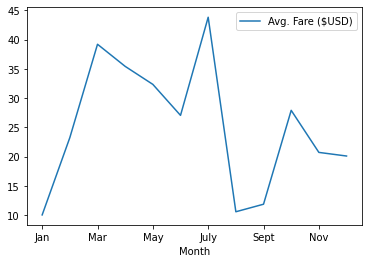

In [3]:
pyber_ride_df.plot(x="Month", y="Avg. Fare ($USD)")
plt.show()

In [4]:
x_axis = np.arange(len(pyber_ride_df))
x_axis

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [5]:
tick_locations = [value for value in x_axis]
tick_locations

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [6]:
print(type(tick_locations))
print(type(x_axis))

<class 'list'>
<class 'numpy.ndarray'>


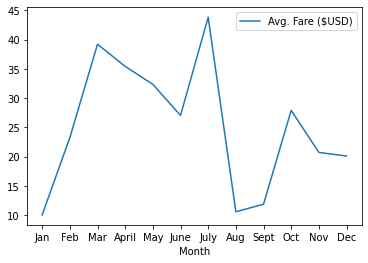

In [7]:
pyber_ride_df.plot(x="Month", y="Avg. Fare ($USD)")
plt.xticks(tick_locations, pyber_ride_df["Month"])
plt.show()

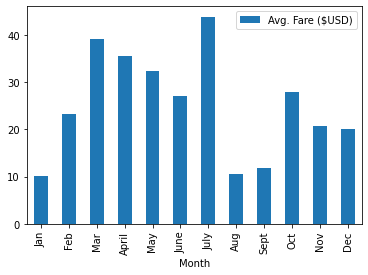

In [8]:
pyber_ride_df.plot.bar(x="Month", y="Avg. Fare ($USD)")
plt.show()

In [9]:
stdev= stat.stdev(pyber_ride_df["Avg. Fare ($USD)"])
stdev

11.208367917035753

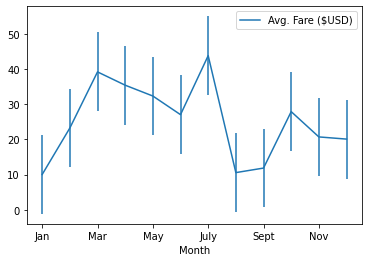

In [10]:
pyber_ride_df.plot(x="Month", y="Avg. Fare ($USD)",yerr=stdev)
plt.show()

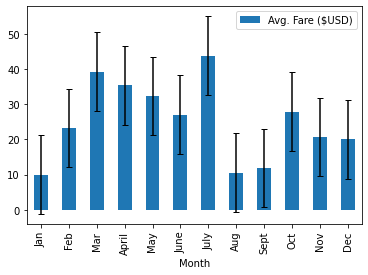

In [11]:
pyber_ride_df.plot(x="Month", y="Avg. Fare ($USD)",kind="bar",yerr=stdev, capsize=3)
plt.show()

In [12]:
city_data_df = pd.read_csv("Resources/city_data.csv")
city_data_df

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
...,...,...,...
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural


In [13]:
ride_data_df = pd.read_csv("Resources/ride_data.csv")
ride_data_df

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277


In [14]:
pd.merge(city_data_df,ride_data_df)

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2019-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2019-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2019-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2019-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2019-04-17 02:26:37,23.00,720020655850
...,...,...,...,...,...,...
2370,Jessicaport,1,Rural,2019-01-31 17:57:25,58.29,623154556195
2371,South Saramouth,7,Rural,2019-02-20 16:32:36,44.29,3622365199969
2372,South Saramouth,7,Rural,2019-01-28 15:55:33,31.25,7118046558393
2373,South Saramouth,7,Rural,2019-03-27 21:07:16,11.87,170351888128


In [15]:
print(len(city_data_df))
print(len(ride_data_df))

120
2375


In [16]:
print(city_data_df.count())
print(city_data_df.isnull().sum())

city            120
driver_count    120
type            120
dtype: int64
city            0
driver_count    0
type            0
dtype: int64


In [17]:
print(ride_data_df.count())
print(ride_data_df.isnull().sum())

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64
city       0
date       0
fare       0
ride_id    0
dtype: int64


In [18]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [19]:
city_data_df.type.unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [20]:
sum(city_data_df["type"]=="Urban")

66

In [21]:
sum(city_data_df["type"]=="Suburban")

36

In [22]:
sum(city_data_df["type"]=="Rural")

18

In [23]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [24]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [25]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
# Create the Suburban city DataFrame.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
# Create the Rural city DataFrame.
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

In [26]:
# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

In [27]:
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count

city
Bradshawfurt         10
Garzaport             3
Harringtonfort        6
Jessicaport           6
Lake Jamie            6
Lake Latoyabury      11
Michaelberg          12
New Ryantown          6
Newtonview            4
North Holly           9
North Jaime           8
Penaborough           5
Randallchester        5
South Jennifer        7
South Marychester     8
South Saramouth       4
Taylorhaven           6
West Heather          9
Name: ride_id, dtype: int64

In [28]:
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare

city
Amandaburgh            24.641667
Barajasview            25.332273
Carriemouth            28.314444
Christopherfurt        24.501852
Deanville              25.842632
                         ...    
West Patrickchester    28.233125
West Robert            25.123871
West Samuelburgh       21.767600
Williamsstad           24.362174
Williamsview           26.599000
Name: fare, Length: 66, dtype: float64

In [29]:
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]


In [30]:
# Get the average number of drivers for each urban city.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [31]:
# Get the average number of drivers for each city for the suburban and rural cities.
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

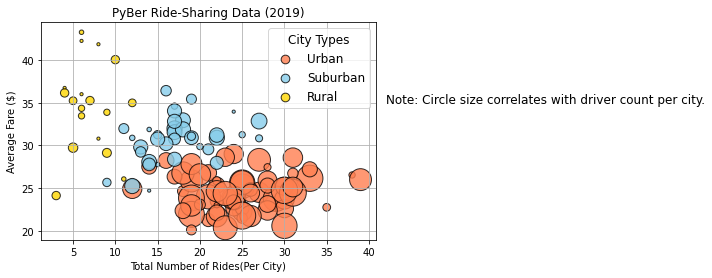

<Figure size 432x288 with 0 Axes>

In [45]:
plt.scatter(urban_ride_count,urban_avg_fare, s=10*urban_driver_count,  c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")
plt.scatter(suburban_ride_count,suburban_avg_fare, s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")
plt.scatter(rural_ride_count,rural_avg_fare, s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.grid()
# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare ($)")

plt.show()
# Save the figure.
plt.savefig("Analysis/Fig1.png")

In [63]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [47]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [48]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [51]:
round(suburban_ride_count.mode(),2)

0    17
dtype: int64

In [53]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [56]:
sts.mode(rural_ride_count)

ModeResult(mode=array([6], dtype=int64), count=array([5]))

In [68]:
urban_fares = urban_cities_df["fare"]
urban_fares.head()
suburban_fares = suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]

In [58]:
print(np.mean(urban_cities_df["fare"]))
print(np.median(urban_cities_df["fare"]))
print(np.mean(suburban_cities_df["fare"]))
print(np.median(suburban_cities_df["fare"]))
print(np.mean(rural_cities_df["fare"]))
print(np.median(rural_cities_df["fare"]))

24.52577230769236
24.64
30.97012800000002
30.75
34.623440000000016
37.05


In [61]:
print(np.mean(urban_cities_df["driver_count"]))
print(np.median(urban_cities_df["driver_count"]))
print(np.mean(suburban_cities_df["driver_count"]))
print(np.median(suburban_cities_df["driver_count"]))
print(round(np.mean(rural_cities_df["driver_count"])))
print(np.median(rural_cities_df["driver_count"]))

36.67815384615385
37.0
13.712
16.0
4
4.0


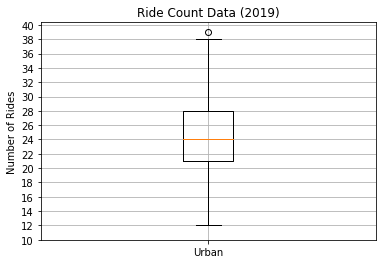

In [62]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

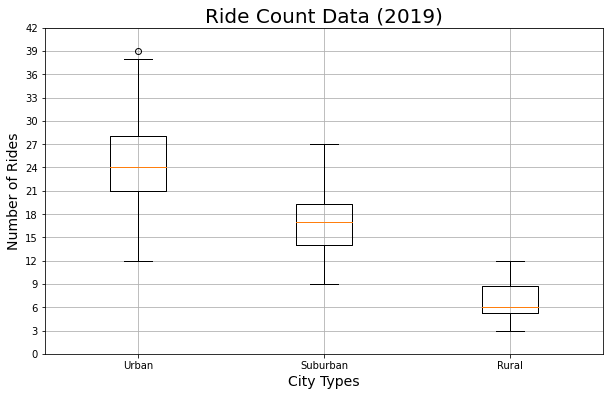

In [72]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

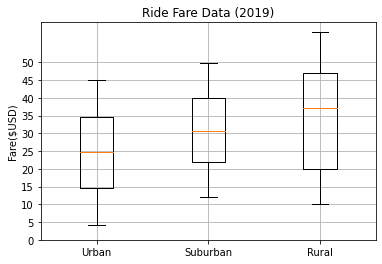

Summary Statistics


<Figure size 432x288 with 0 Axes>

In [73]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban", "Suburban","Rural"]
fares_avg = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots()
ax.boxplot(fares_avg, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
plt.savefig("analysis/Fig3.png")
plt.show()

In [66]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


In [74]:
urban_drivers = urban_cities_df['driver_count']
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']


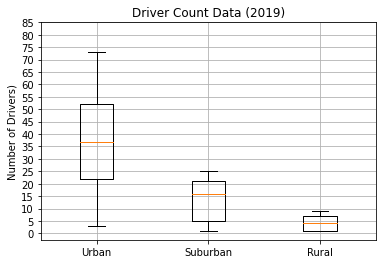

Summary Statistics


<Figure size 432x288 with 0 Axes>

In [75]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban","Suburban","Rural"]
city_drivers = [urban_drivers,suburban_drivers,rural_drivers]
fig, ax = plt.subplots()
ax.boxplot(city_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
plt.savefig("analysis/Fig4.png")
plt.show()

In [76]:
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [81]:
fares_by_type = pyber_data_df.groupby("type").sum()["fare"]
fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [82]:
fares_by_type.sum()

63538.64

In [83]:
urban_percent = fares_by_type["Urban"]/fares_by_type.sum() *100
urban_percent

62.72463496228436

In [84]:
suburban_percent = fares_by_type["Suburban"]/fares_by_type.sum() *100
rural_percent = fares_by_type["Rural"]/fares_by_type.sum() *100

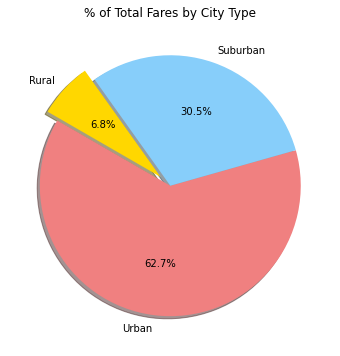

In [89]:
fares_percent = [urban_percent, suburban_percent, rural_percent]

# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl

plt.subplots(figsize=(10, 6))
plt.pie(fares_percent,
    labels=["Urban","Suburban","Rural"],
    colors=[ "lightcoral", "lightskyblue", "gold"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig5.png")
# Show Figure
plt.show()

In [90]:
rides_percent = pyber_data_df.groupby("type").count()["ride_id"]/pyber_data_df.groupby("type").count()["ride_id"].sum() *100
rides_percent

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

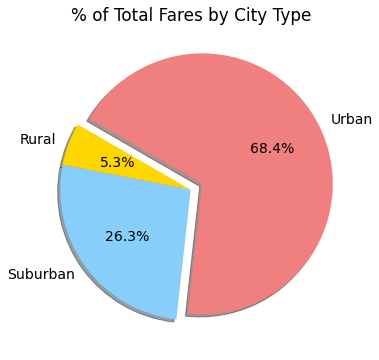

In [91]:
plt.subplots(figsize=(10, 6))
plt.pie(rides_percent,
    labels=["Rural","Suburban","Urban"],
    colors=[ "gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig6.png")
# Show Figure
plt.show()

In [94]:
drivers_percent = pyber_data_df.groupby("type").sum()["driver_count"]/pyber_data_df.sum()["driver_count"] *100
drivers_percent

type
Rural        0.781557
Suburban    12.472893
Urban       86.745550
Name: driver_count, dtype: float64

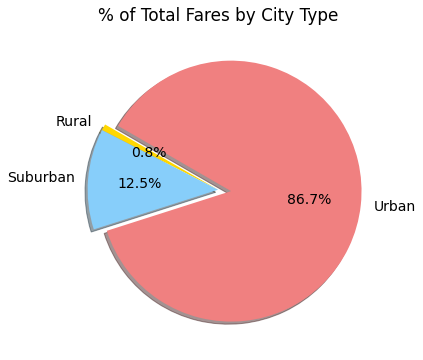

In [93]:
plt.subplots(figsize=(10, 6))
plt.pie(drivers_percent,
    labels=["Rural","Suburban","Urban"],
    colors=[ "gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig7.png")
# Show Figure
plt.show()